In [69]:
import pandas as pd
import numpy as np
from sklearn import datasets
import random
from typing import List, Tuple
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
data = iris.data
df = pd.DataFrame(data, columns=iris.feature_names)

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [93]:
def distancia_euclidiana(point1: np.array, point2:np.array) -> float:
  return np.sqrt(np.sum((point1 - point2)**2))

def inicializar_centroides(data: pd.DataFrame, k:int) -> pd.DataFrame:
    indices_centroides = random.sample(range(len(data)),k)
    centroides = data.iloc[indices_centroides]
    return centroides

def asignar_a_cluster(data: pd.DataFrame, centroides: pd.DataFrame) -> List[List[pd.Series]]:
  clusters = [[] for i in range(len(centroides))]
  for _, point in data.iterrows():
    distancias = []
    for _,centroide in centroides.iterrows():
      distancia = distancia_euclidiana(point,centroide)
      distancias.append(distancia)
    idx_centroide_mas_cercano = np.argmin(distancias)
    clusters[idx_centroide_mas_cercano].append(point)

  return clusters

def actualizar_centroides(clusters: List[List[pd.Series]]) -> pd.DataFrame:
  centroides_act = []
  for cluster in clusters:
    centroides_act.append(pd.DataFrame(cluster).mean())
  return pd.DataFrame(centroides_act)

def convergencia(centroides_viejos: pd.DataFrame, centroides_nuevos:pd.DataFrame, tol:float = 1e-4) -> bool:
  return np.all(np.abs(centroides_nuevos - centroides_viejos) < tol)

def k_means(data: pd.DataFrame, k: int, max_iterations: int = 100) -> Tuple[pd.DataFrame, List[List[pd.Series]]]:
    centroides = inicializar_centroides(data, k)
    iteration = 0

    while iteration < max_iterations:
        clusters = asignar_a_cluster(data, centroides)
        nuevos_centroides = actualizar_centroides(clusters)

        if convergencia(centroides, nuevos_centroides):
            break

        centroides = nuevos_centroides
        iteration += 1

    return pd.DataFrame(centroides), clusters

In [92]:
centroides = inicializar_centroides(df,3);
centroides

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
135,7.7,3.0,6.1,2.3
29,4.7,3.2,1.6,0.2
41,4.5,2.3,1.3,0.3


In [ ]:
clusters = asignar_a_cluster(df,centroides)
clusters

In [48]:
len(clusters)

3

In [51]:
for i in range(len(clusters)):
  print(f"Datos en cluster {i+1}: {len(clusters[i])}")

Datos en cluster 1: 62
Datos en cluster 2: 50
Datos en cluster 3: 38


In [60]:
centroides_act = actualizar_centroides(clusters)
centroides_act

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,6.601613,2.985484,5.400,1.924194
1,5.006000,3.428000,1.462,0.246000
2,5.707895,2.686842,4.100,1.271053


In [125]:
k = 3
centroides, clusters = k_means(df,k)

In [113]:
centroides

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.006000,3.428000,1.462000,0.246000
1,5.883607,2.740984,4.388525,1.434426
2,6.853846,3.076923,5.715385,2.053846


In [103]:
centroides.keys

<bound method NDFrame.keys of    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           5.883607          2.740984           4.388525          1.434426
1           6.853846          3.076923           5.715385          2.053846
2           5.006000          3.428000           1.462000          0.246000>

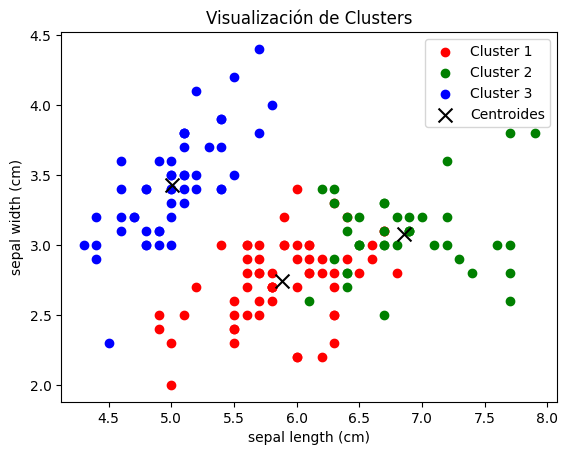

In [107]:
colors = ['r', 'g', 'b']
for i, cluster in enumerate(clusters):
    cluster_data = pd.DataFrame(cluster, columns=["sepal length (cm)", "sepal width (cm)", "petal length (cm)", "petal width (cm)"])
    plt.scatter(cluster_data["sepal length (cm)"], cluster_data["sepal width (cm)"], label=f'Cluster {i + 1}', c=colors[i])

plt.scatter(centroides["sepal length (cm)"], centroides["sepal width (cm)"], marker='x', s=100, c='black', label='Centroides')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.legend()
plt.title("Visualización de Clusters")
plt.show()

In [124]:
from sklearn.cluster import KMeans
k = 3

# Inicializar y ajustar el modelo K-Means
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(df)

# Obtener los centroides
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df.columns)

# Imprimir los centroides
print("Centroides:")
print(centroids)

Centroides:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           5.901613          2.748387           4.393548          1.433871
1           5.006000          3.428000           1.462000          0.246000
2           6.850000          3.073684           5.742105          2.071053


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [126]:
centroides

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.883607,2.740984,4.388525,1.434426
1,5.006000,3.428000,1.462000,0.246000
2,6.853846,3.076923,5.715385,2.053846
